## Read csv file and preprocessing of data

### categorical to numeric value ,replace values of categorical data to numeric data
#### find the correlation among the feature

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import warnings
warnings.filterwarnings(action="ignore")

In [30]:
df=pd.read_csv("50_Startups.csv")
df.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [31]:
df.describe()

,RnD,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnD             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [33]:
#check if any data is missing
df.isna().sum()

RnD               0
Administration    0
Marketing         0
State             0
Profit            0
dtype: int64

## convert the categorical data into a numeric data
#### ordinal encoder/label encoder/one hot encoder

In [34]:
# step1 : find the unique states
unique_states= df['State'].unique()

In [35]:
unique_states

array(['New York', 'California', 'Florida'], dtype=object)

In [36]:
# step 2: replace the unique values with a number
unique_states_numbers = [1,2,3] 
df.replace(unique_states,unique_states_numbers,inplace=True)

In [37]:
df.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnD             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     int64  
 4   Profit          50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [39]:
df.columns

Index(['RnD', 'Administration', 'Marketing', 'State', 'Profit'], dtype='object')

In [40]:
df.corr()

,RnD,Administration,Marketing,State,Profit
RnD,1.000000,0.241955,0.724248,0.037930,0.972900
Administration,0.241955,1.000000,-0.032154,0.003026,0.200717
Marketing,0.724248,-0.032154,1.000000,0.137777,0.747766
State,0.037930,0.003026,0.137777,1.000000,0.048471
Profit,0.972900,0.200717,0.747766,0.048471,1.000000


In [41]:
print(f"Correlation for Profit and RnD = {df['Profit'].corr(df['RnD'])}")
print(f"Correlation for Profit and Administration = {df['Profit'].corr(df['Administration'])}")
print(f"Correlation for Profit and Marketing = {df['Profit'].corr(df['Marketing'])}")


Correlation for Profit and RnD = 0.9729004656594832
Correlation for Profit and Administration = 0.20071656826872125
Correlation for Profit and Marketing = 0.7477657217414766


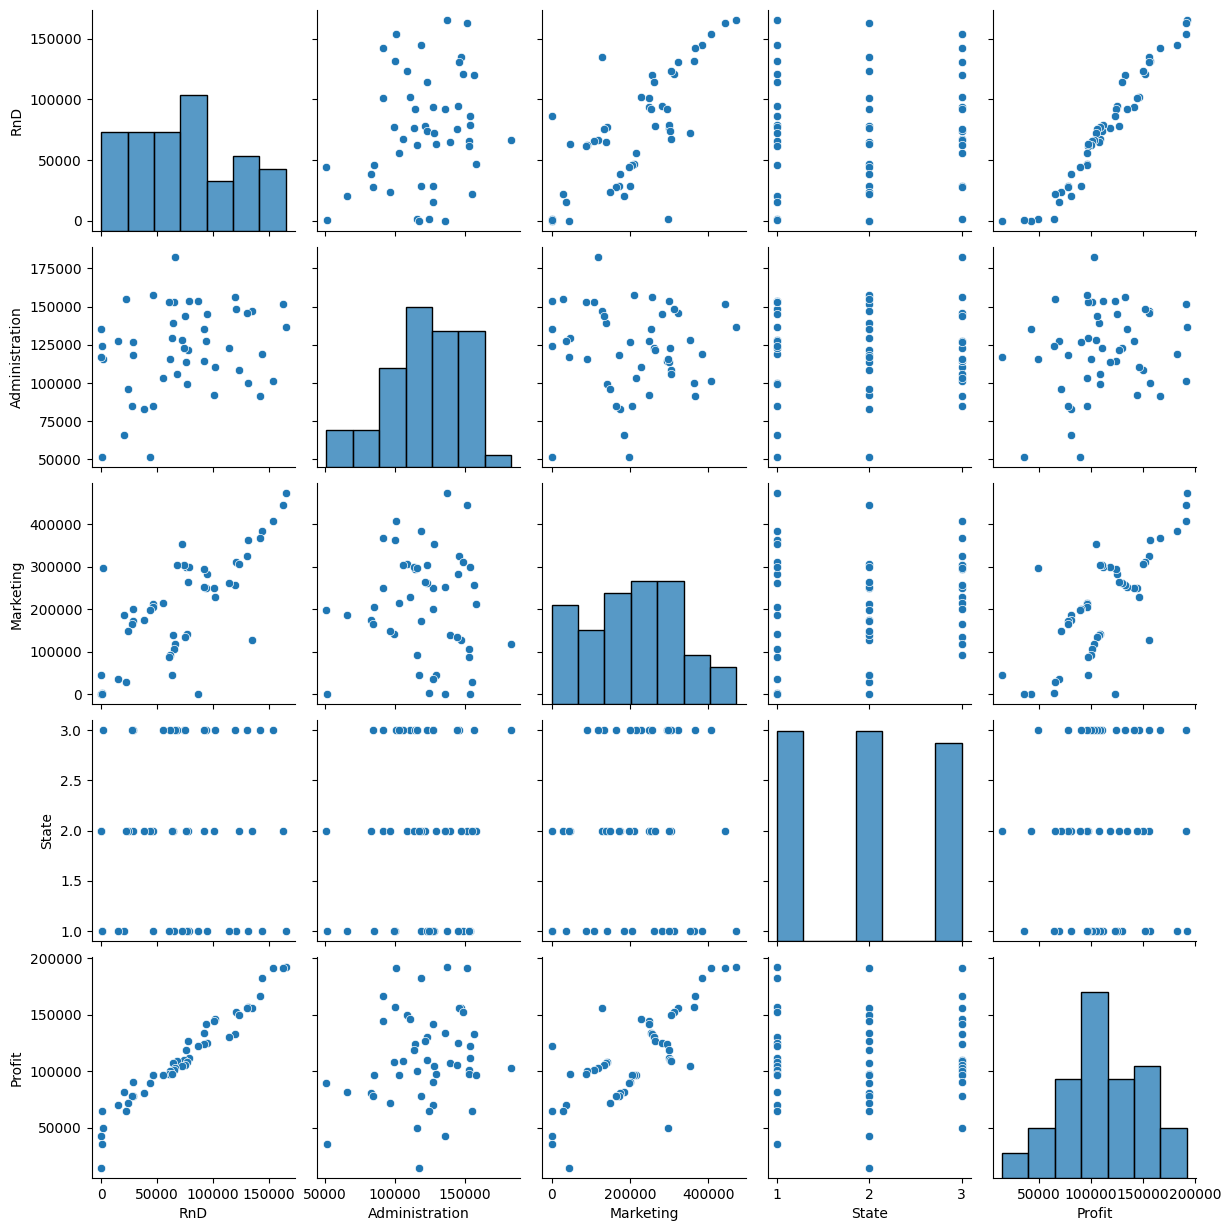

In [42]:
# data visulization
sns.pairplot(df)

In [43]:
# drop the stae column
df.drop('State',axis=1,inplace=True)

<Axes: >

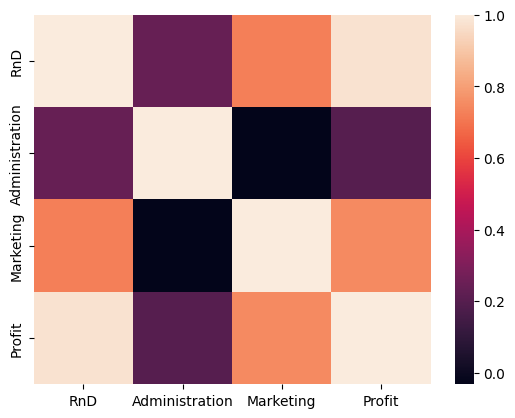

In [44]:
sns.heatmap(df.corr())

#### data cleansing

In [45]:
#from the correlation and pairplot, Administration is not a significant independent variable
df.drop('Administration',axis=1 ,inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RnD        50 non-null     float64
 1   Marketing  50 non-null     float64
 2   Profit     50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


#### split the data

In [47]:
x= df.drop('Profit',axis=1)

y = df['Profit']
           

#### model building

In [48]:
from sklearn.linear_model import LinearRegression

#create the model
model = LinearRegression()

# train the model
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### model evaluation


In [49]:
model.score(x,y)

0.9504503015559763